In [1]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)


with open('dataset/hero_names.csv', 'rt', encoding='utf-8') as f:
    heroes = [row for row in reader(f)]
heroes = heroes[1:]


with open('dataset/players.csv', 'rt', encoding='utf-8') as f:
    players = [row for row in reader(f)]
players = np.array(players[1:])


with open('dataset/match.csv', 'rt', encoding='utf-8') as f:
    matches = [row for row in reader(f)]
matches = np.array(matches[1:])




In [2]:
#
# MOST PLAYED HEROES
#

hero_names = { hero[1]: hero[2] for hero in heroes }
hero_count = {}


for player in players:    
    
    #hero_id
    player_key = player[2]
    
    #add key to dict if not present
    if player_key not in hero_count:
        hero_count[player_key] = 0
    
    #increment amount key was seen in dataset
    hero_count[player_key] += 1
    
#sort by max value
sorted_hero_count = sorted(hero_count.items(), key=lambda kv: kv[1])[::-1]

place = 1
for key, value in sorted_hero_count[0:10]:
    #print(str(place) + ".\t", hero_names[key], ",", value)
    print("%2d. %20s %10s" % (place, hero_names[key], value) )
    place += 1



 1.           Windranger      20881
 2.         Shadow Fiend      17007
 3.              Invoker      11676
 4.          Earthshaker      11323
 5.              Slardar      11181
 6.        Queen of Pain      10590
 7.           Juggernaut      10394
 8.                 Tusk      10306
 9.            Alchemist       9823
10.                Pudge       9447


In [3]:
#
# BEST WIN RATIO HERO
#

hero_names = { hero[1]: hero[2] for hero in heroes }
hero_count = {}


winning_matches = { match[0] for match in matches if match[9] == 'True'  }

#print(winning_matches)

for player in players:    
    
    #hero_id
    player_key = player[2]
    match_key = player[0]
    
    
    #add key to dict if not present
    if player_key not in hero_count:
        hero_count[player_key] = dict()
        hero_count[player_key]["win"] = 0
        hero_count[player_key]["loss"] = 0
    
    if match_key in winning_matches:
        hero_count[player_key]["win"] += 1
    else:
        hero_count[player_key]["loss"] += 1

hero_win_percentage = dict()
for index, hero in hero_count.items():
    hero_win_percentage[index] = hero["win"] / (hero["win"] + hero["loss"])
        
sorted_hero_win_percentage = sorted(hero_win_percentage.items(), key=lambda kv: kv[1])[::-1]        

place = 1
for key, value in sorted_hero_win_percentage[0:10]:
    #print(str(place) + ".\t", hero_names[key], ",", value)
    print("%2d. %20s %10.5f" % (place, hero_names[key], value) )
    place += 1

 1.                 Luna    0.53406
 2.              Abaddon    0.53293
 3.        Shadow Shaman    0.53190
 4.                Razor    0.53148
 5.               Kunkka    0.53008
 6.     Legion Commander    0.52942
 7.               Weaver    0.52845
 8.              Warlock    0.52806
 9.            Timbersaw    0.52761
10.              Spectre    0.52748


0
1
190
415671
417884
472
6
1
0


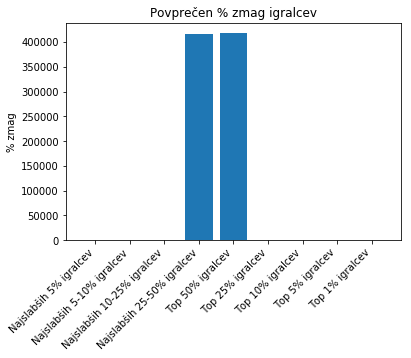

In [35]:
#
# SEPERATE USERS INTO SKILL GROUPS
#

with open('dataset/player_ratings.csv', 'rt', encoding='utf-8') as f:
    player_ratings = [row for row in reader(f)]
player_ratings = np.array(player_ratings[1:])

mmr_max = 50;

mmr_groups = [0,0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99,1]
mmr_group_names = [
    "Najslabših 5% igralcev",
    "Najslabših 5-10% igralcev",
    "Najslabših 10-25% igralcev", 
    "Najslabših 25-50% igralcev",
    "Top 50% igralcev",
    "Top 25% igralcev",
    "Top 10% igralcev",
    "Top 5% igralcev",
    "Top 1% igralcev"
]

mmr_group_thresholds = [mmr_max * percentage for percentage in mmr_groups]

player_mmr_groups = []

for i in range(len(mmr_groups)-1):
    min_rank = mmr_group_thresholds[i]
    max_rank = mmr_group_thresholds[i+1]
    player_mmr_groups.append( np.array([ player_rating for player_rating in player_ratings if min_rank < float(player_rating[3]) < max_rank ]))

for mmr_group in player_mmr_groups:
    print(len(mmr_group))
    

x, y = zip(*named_average_group_win_percentage_tuple)
plt.bar(mmr_group_names, [ len(mmr_group) for mmr_group in player_mmr_groups ])
plt.title("Povprečen % zmag igralcev")
plt.xticks(rotation=45, ha='right')
plt.ylabel('% zmag')
plt.show()

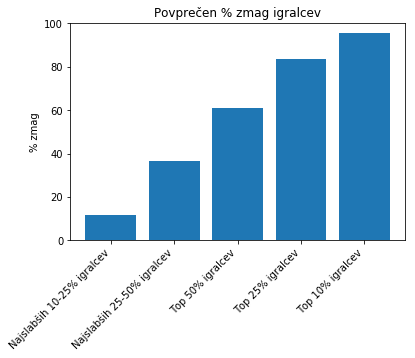

In [34]:
#
# AVERAGE WIN RATE PER GROUP
#

average_group_win_percentage = []

for player_mmr_group in player_mmr_groups:
    if len(player_mmr_group) < 2:
        average_group_win_percentage.append(0)
        continue
        
    average_game_win_count = sum(player_mmr_group[:,1].astype(np.float)) / len(player_mmr_group)
    average_game_count = sum(player_mmr_group[:,2].astype(np.float)) / len(player_mmr_group)
    average_win_percentage = average_game_win_count/average_game_count * 100
    
    average_group_win_percentage.append(average_win_percentage)
    
    #print(average_game_count, average_game_win_count, average_win_percentage )

named_average_group_win_percentage_tuple = []

for index, average_win_percentage in enumerate(average_group_win_percentage):
    if average_win_percentage == 0:
        continue
    
    named_average_group_win_percentage_tuple.append((mmr_group_names[index], average_win_percentage))

x, y = zip(*named_average_group_win_percentage_tuple)
plt.bar(x, y)
plt.title("Povprečen % zmag igralcev")
plt.xticks(rotation=45, ha='right')
plt.ylabel('% zmag')
plt.show()

In [6]:
with open('dataset/players.csv', 'rt', encoding='utf-8') as f:
    players = [row for row in reader(f)]
players = np.array(players[1:])

player_heroes = dict()

for player in players:
    account_id = player[1]
    hero_id = player[2]
    
    if account_id not in player_heroes:
        player_heroes[account_id] = []
    
    player_heroes[account_id].append(hero_id)    

In [7]:
mmr_groups_hero_list = []

for player_mmr_group in player_mmr_groups:
    
    mmr_group_hero_list = []
    
    for player in player_mmr_group:
        account_id = player[0]

        if account_id in player_heroes:
            mmr_group_hero_list.extend(player_heroes[account_id])
        
    mmr_group_hero_list = np.array(mmr_group_hero_list)
    mmr_groups_hero_list.append(mmr_group_hero_list)

In [8]:
with open('dataset/hero_names.csv', 'rt', encoding='utf-8') as f:
    heroes_list = [row for row in reader(f)]
heroes_list = np.array(heroes_list[1:])

heroes_dict = dict()

for hero in heroes:
    hero_id = hero[1]
    hero_name = hero[2]
    heroes_dict[hero_id]=hero_name


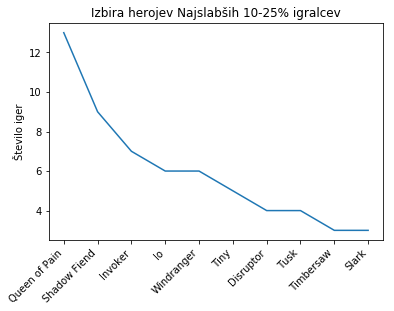

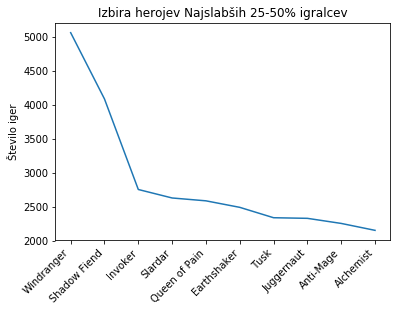

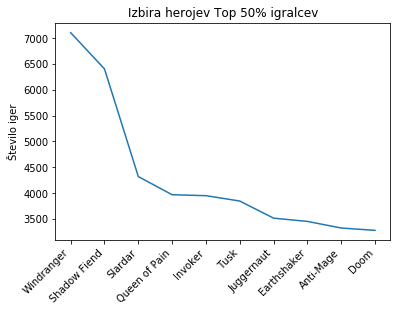

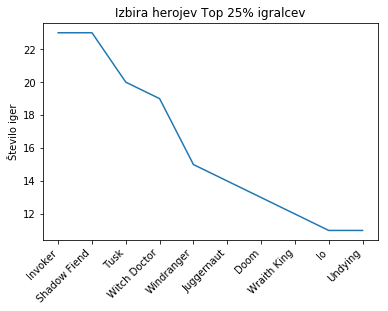

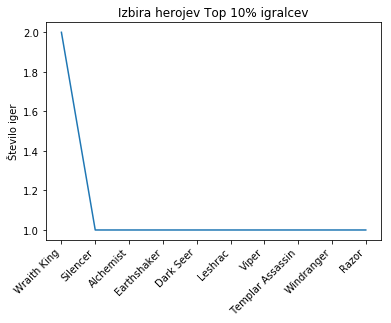

In [33]:
#
# MOST PLAYED RANKS BY SKILL GROUPS
#

for index, mmr_group_hero_list in enumerate(mmr_groups_hero_list):
    if len(mmr_group_hero_list) == 0:
        continue
        
    unique, counts = np.unique(mmr_group_hero_list, return_counts=True)

    mmr_group_hero_dict = dict(zip(unique, counts))
    mmr_group_hero_ordered_tuple = sorted(mmr_group_hero_dict.items(), key=lambda kv: kv[1])[::-1]

    for i in range(len(mmr_group_hero_ordered_tuple)):
        key = mmr_group_hero_ordered_tuple[i][0] 
        value = mmr_group_hero_ordered_tuple[i][1]
        
        if key not in heroes_dict:
            continue
            
        mmr_group_hero_ordered_tuple[i] = (heroes_dict[key], value)
    
    

    x, y = zip(*mmr_group_hero_ordered_tuple[:10])
    
    plt.plot(x, y)
    plt.title("Izbira herojev " + mmr_group_names[index])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Število iger')
    plt.show()

In [10]:
with open('dataset/item_ids.csv', 'rt', encoding='utf-8') as f:
    items_list = [row for row in reader(f)]
items_list = np.array(items_list[1:])

items_dict = { item[0]: item[1] for item in items_list}

In [11]:
with open('dataset/purchase_log.csv', 'rt', encoding='utf-8') as f:
    purchases_list = [row for row in reader(f)]
purchases_list = np.array(purchases_list[1:])

In [12]:
#
# MOST PURCHASED ITEMS
#

purchases_dict = dict()

for purchase in purchases_list:
    item_id = purchase[0]
    if item_id not in purchases_dict:
        purchases_dict[item_id] = 0
    purchases_dict[item_id] += 1

sorted_purchases_dict = sorted(purchases_dict.items(), key=lambda kv: kv[1])[::-1]        

place = 1
for key, value in sorted_purchases_dict[0:10]:
    #print(str(place) + ".\t", hero_names[key], ",", value)
    print("%2d. %20s %.0f" % (place, items_dict[key], value) )
    place += 1
    

 1.             tpscroll 3864464
 2.        ward_observer 1214710
 3.             branches 745330
 4.                boots 551272
 5.                tango 490735
 6.          ward_sentry 466971
 7.       ward_dispenser 453635
 8.              circlet 412626
 9.              clarity 369774
10.             ogre_axe 300991


In [13]:
#
# MOST PURCHASED SKILLS
#

